# Logistic Regression Project 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [66]:
df = pd.read_csv('titanic.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis
Dokonamy najpierw wstępnej analizy a następnie oczyścimy dane z wartości NaN

<AxesSubplot:>

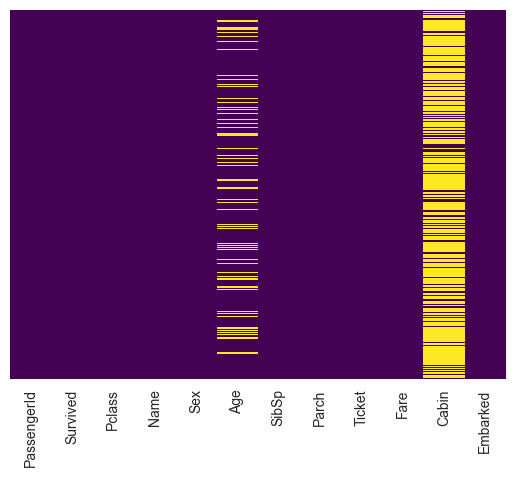

In [64]:
# Heatmapa przedstawiająca wartości Nan (żółty)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

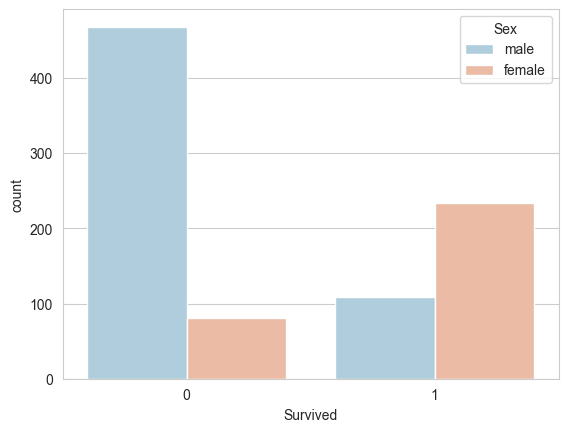

In [65]:
sns.countplot(x = 'Survived', data = df, hue= 'Sex', palette='RdBu_r')

Widzimy zatem, że większość ocalałych była kobietami

<AxesSubplot:xlabel='Survived', ylabel='count'>

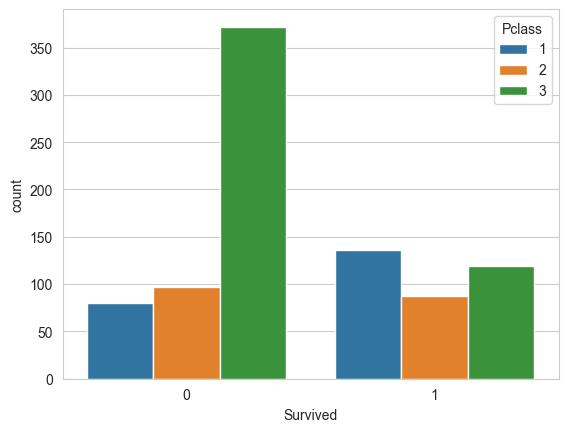

In [9]:
sns.countplot(x = 'Survived', data = df, hue= 'Pclass')

<AxesSubplot:ylabel='Frequency'>

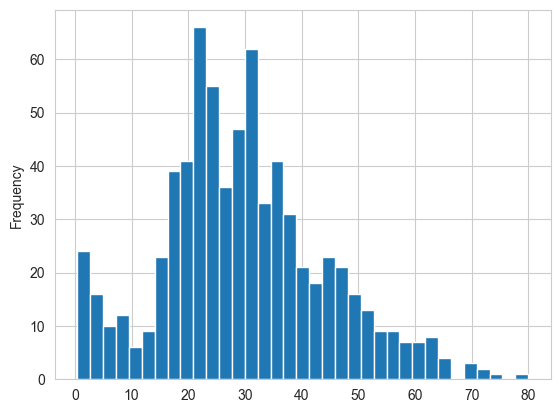

In [10]:
# sns.histplot(train['Age'].dropna(), bins = 30)
df['Age'].plot.hist(bins = 35)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

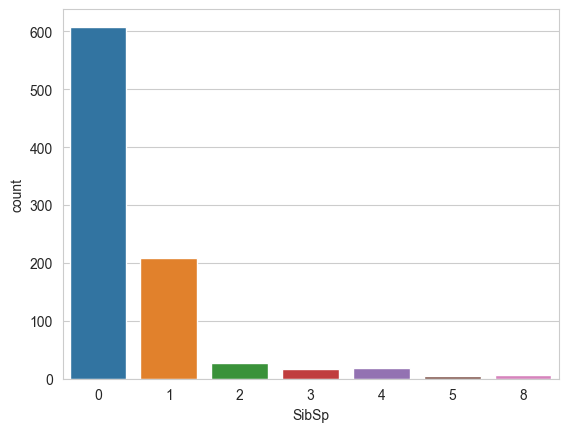

In [12]:
sns.countplot(data = df, x = 'SibSp')

<AxesSubplot:>

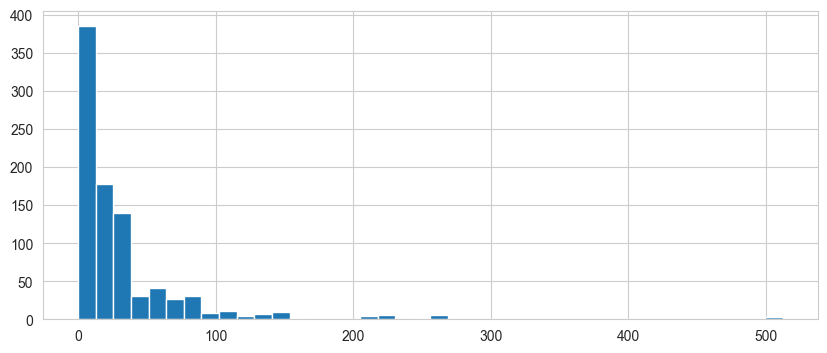

In [13]:
df['Fare'].hist(bins = 40, figsize=(10,4))

In [14]:
import cufflinks as cf

In [15]:
cf.go_offline()

In [16]:
# train['Fare'].iplot(kind = 'hist')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

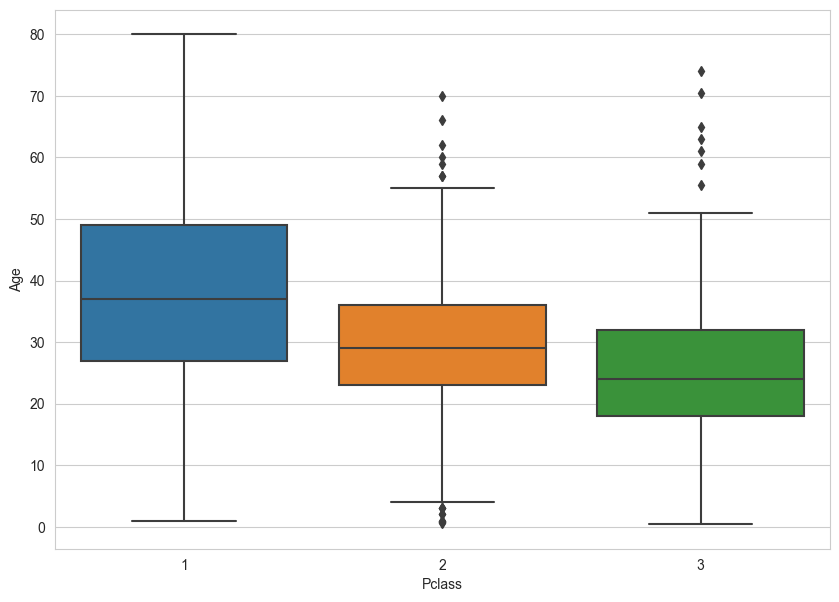

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

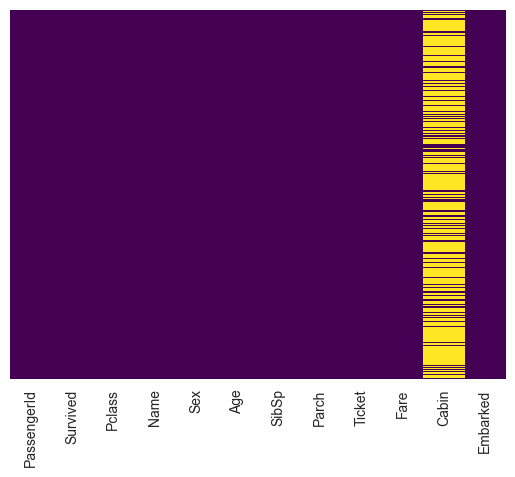

In [20]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [21]:
df.drop('Cabin', axis = 1, inplace=True)

In [22]:
df.dropna(inplace=True)

<AxesSubplot:>

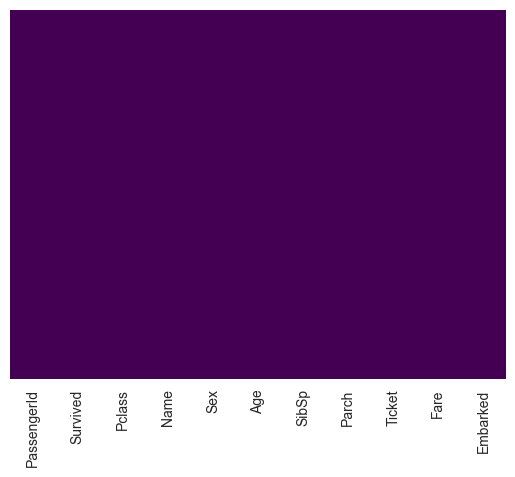

In [23]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [24]:
sex = pd.get_dummies(df['Sex'], drop_first=True,dtype=float)

In [25]:
embark = pd.get_dummies(df['Embarked'], drop_first=True, dtype=float)

In [27]:
df = pd.concat([df, sex, embark], axis=1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0,1.0


In [29]:
df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [31]:
df.drop('PassengerId', axis = 1, inplace=True)

In [32]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [33]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train, y_train)

C:\Users\xxx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

In [44]:
# Teraz podzielimy kolumnę Pclass na kategorie

In [46]:
Pclass = pd.get_dummies(df['Pclass'], dtype=float, drop_first=True)
Pclass.columns = Pclass.columns.map(lambda x:str(x))

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [48]:
df = pd.concat([df, Pclass],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    float64
 7   Q         889 non-null    float64
 8   S         889 non-null    float64
 9   2         889 non-null    float64
 10  3         889 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 83.3 KB


In [49]:
df.drop('Pclass', axis=1, inplace=True)

In [50]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train, y_train)

C:\Users\xxx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [57]:
prediction = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

